# Ejercicio 5

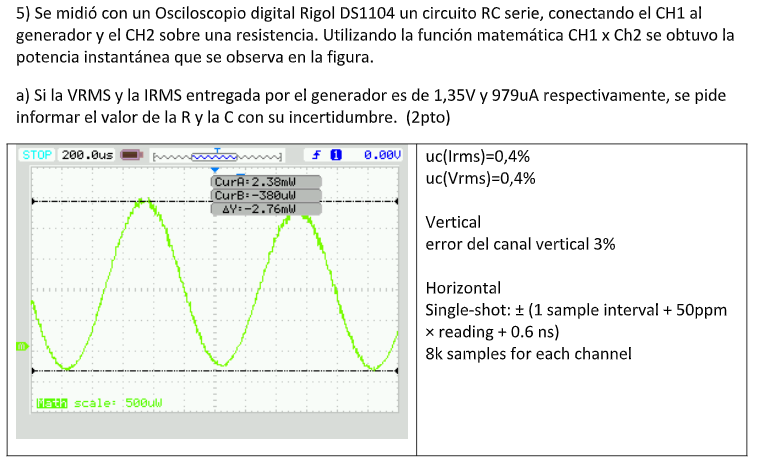

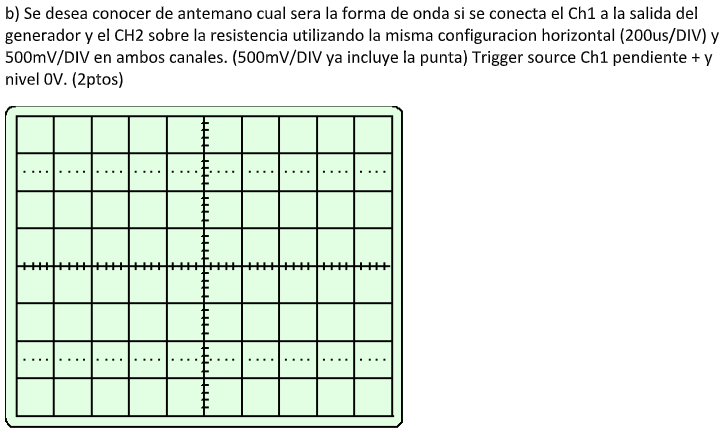

### Parte A

#### Calculo del valor de la resistencia

Siendo la potencia instantania pico:

$$
P_{ip} = cur_a + cur_b
$$

Siendo la potencia activa:

$$
P_g = \frac{P_{ip}}{2}
$$

Siendo el valor de la resistencia:

$$
R = \frac{P_g}{I^2_{RMS}}
$$

In [1]:
from math import sqrt

CUR_A = 2.38e-3
CUR_B = -380e-6
I_RMS = 979e-6
V_RMS = 1.35

pipp = CUR_A + CUR_B
pg = pipp / 2
r =  pg / I_RMS ** 2

print("El valor de la potencia instantanea pico es: {} W".format(pipp))
print("El valor de la potencia activa es: {} W".format(pg))
print("El valor de la resistencia es: {} ohms".format(r))

#### Calculo de la incertidumbre de la resistencia

Siendo el cuadrado de la incertidumbre combinada relativa de la potencia instantanea pico:

$$
u^2_{cR}(P_{ip}) = (\frac{err_{cv}}{\sqrt{3}})^2 + (\frac{err_{cv}}{\sqrt{3}})^2
$$

In [2]:
ERR_CV = 0.03 / sqrt(3)

ucr_pip = sqrt( ERR_CV ** 2 + (-ERR_CV) ** 2)

print("La incertidumbre combinada de la potencia instantana pico es: {}".format(ucr_pip))

Siendo el cuadrado de la incertidumbre relativa de la potencia activa:

$$
u^2_{cR}(P_g) = u^2_{cR}(P_{ip})
$$

In [3]:
ucr_pg = ucr_pip

print("La incertidumbre combinada de la potencia aparente es: {}".format(ucr_pg))

Siendo el cuadrado de la incertidumbre relativa de la resistencia:

$$
u^2_{cR}(R) = [~1~.~u_{cR}(P_g)~]^2 + [~-2~.~u_{cR}(I_{RMS})~]^2
$$

In [4]:
UCR_IRMS = (0.4 / 100) / sqrt(3)

ucr_r = sqrt( (ucr_pg) ** 2 + (-2 * UCR_IRMS) ** 2 )

print("La incertidumbre combinada relativa de la resistencia es: {}".format(ucr_r))

La incertidumbre combinada relativa de la resistencia es: 0.024926558794453227


Siendo la incertidumbre expandida de la resistencia asumiendo distribucion normal:

$$
u(R) = u_{cR}(R)~.~K_{expansion}~.~R~~~~~~~~~~~K_{expansion}= 2
$$

In [5]:
K = 2

u_r = ucr_r * K * r

print("La incertidumbre expandida de la resistencia es: {} ohms".format(u_r))

La incertidumbre expandida de la resistencia es: 52.014800690816074 ohms


Siendo el valor de la resistencia para un intervalo de confianza del 95,45%:

$$
R = ( 1043,361;\pm~52,015)~\Omega
$$

#### Calculo del valor del capacitor

Siendo la potencia aparente:

$$
S_g = V_{RMS}~.~I_{RMS} 
$$

Siendo la potencia reactiva:

$$
Q_g = \sqrt{S^2_g - P^2_g}
$$

Siendo la impedancia capacitiva:

$$
Z_c = \frac{Q_g}{I^2_{RMS}}
$$

Siendo la velocidad angular de la tension:

$$
\omega = \frac{2~.~\pi}{2~.~T}
$$

Siendo la capacidad:

$$
C = \frac{1}{Z_c~.~\omega}
$$

In [6]:
from math import pi

DIV_T = 200e-6
N_DIV_T = 5

sg = V_RMS * I_RMS
qg = sqrt(sg ** 2 - pg ** 2)
zc = qg / I_RMS ** 2
t = N_DIV_T * DIV_T
omega = pi / t
c = 1 / (zc * omega)

print("El valor de la potencia aparente es: {} W".format(sg))
print("El valor de la potencia reactiva es: {} W".format(qg))
print("El valor de la impedancia capacitiva es: {} ohms".format(zc))
print("El valor del periodo es: {} s".format(t))
print("El valor de la frecuencia angular es: {} 1/s".format(omega))
print("El valor del capacitor es: {} F".format(c))

El valor de la potencia aparente es: 0.0013216500000000002 W
El valor de la potencia reactiva es: 0.0008641520251090086 W
El valor de la impedancia capacitiva es: 901.6225569534364 ohms
El valor del periodo es: 0.001 s
El valor de la frecuencia angular es: 3141.592653589793 1/s
El valor del capacitor es: 3.530411741908422e-07 F


#### Calculo de la incertidumbre del capacitor

Siendo el cuadrado de la incertidumbre combinada relativa de la potencia aparente:

$$
u^2_{cR}(S_g) = [~1~.~u_{cR}(V_{RMS})~]^2 + [1~.~u_{cR}(I_{RMS})~]^2
$$

In [7]:
UCR_VRMS = (0.4 / 100) / sqrt(3)

ucr_sg = sqrt( UCR_VRMS ** 2 + UCR_IRMS ** 2 )

print("El valor de la incertidumbre combinada relativa de la potencia aparente es: {}".format(ucr_sg))

El valor de la incertidumbre combinada relativa de la potencia aparente es: 0.0032659863237109042


Siendo el cuadrado de la incertidumbre combinada relativa de la potencia reactiva:

$$
u^2_{cR}(Q_g) = (\frac{S_g}{\sqrt{(S^2_g - P^2_g)}})^2~.~u^2_{cR}(S_g) + (-\frac{P_g}{\sqrt{(S^2_g - P^2_g)}})^2~.~u^2_{cR}(P_g)
$$

In [8]:
d1 = sg / (sqrt(sg ** 2 - pg ** 2))
d2 = - pg / (sqrt(sg ** 2 - pg ** 2))

ucr_qg = sqrt(d1 ** 2 * ucr_sg ** 2 + d2 ** 2 * ucr_pg ** 2 )

print("El valor de la incertidumbre combinada relativa de la potencia reactiva es: {}".format(ucr_qg))

El valor de la incertidumbre combinada relativa de la potencia reactiva es: 0.028782338145353324


Siendo el cuadrado de la incertidumbre combinada relativa de la impedancia capacitiva:

$$
u^2_{cR}(Z_c) = 1^2~.~U^2_{cR}(Q_g) + (-2)^2~.~U^2_{cR}(I_{RMS})
$$

In [9]:
ucr_zc = sqrt( ucr_qg ** 2 + (-2) ** 2 * UCR_IRMS ** 2 )

print("La incertidumbre combinada relativa de la impedancia capacitiva es: {}".format(ucr_zc))

La incertidumbre combinada relativa de la impedancia capacitiva es: 0.029150580139112058


Siendo el cuadrado de la incertidumbre combinada relativa de la velocidad angular:

$$
u^2_{cR}(\omega) = u^2_{cR}(T) = (\frac{err_{min~div}}{N_{div}~.~\sqrt{3}})^2
$$

In [10]:
ERR_MIN_DIV = 0.2
N_DIV = 5

ucr_omega = ERR_MIN_DIV / ( N_DIV * sqrt(3) )

print("La incertidumbre combinada relativa de la velocidad angular es: {}".format(ucr_omega))

La incertidumbre combinada relativa de la velocidad angular es: 0.023094010767585035


Siendo el cuadrado la incertidumbre relativa de la capacidad:

$$
u^2_{cR}(C) = (-1)^2~.~u^2_{cR}(Z_c) + (-1)^2~.~u^2_{cR}(\omega)
$$

In [11]:
ucr_c = sqrt( (-1) ** 2 * ucr_zc ** 2 + (-1) ** 2 * ucr_omega ** 2)

print("La incertidumbre combinada relativa de la capacidad es: {}".format(ucr_c))

La incertidumbre combinada relativa de la capacidad es: 0.03718991336075049


Siendo la incertidumbre expandida de la capacidad asumiendo distribucion normal:
    
$$
U_c = u_{cR}(C)~.~C~.~K_{expansion}~~~~~~~~~~~~~con~~~~K_{expansion} = 2
$$

In [12]:
K_EXP = 2

u_c = ucr_c * c * K_EXP

print("El valor de la incertidumbre expandida de la capacidad es: {} F".format(u_c))

El valor de la incertidumbre expandida de la capacidad es: 2.6259141361870086e-08 F


Por lo tanto, el valor del capacitor es:

$$
C = (353,04~;\pm~26,26)~nF
$$

### Parte B

Siendo el valor pico de tension de la fuente:

$$
V_p(g) = V_{gRMS}~.~\sqrt{2}
$$

Siendo el valor eficaz de la tension que cae en la resistencia:

$$
V_{RMS}(R) = R~.~I_RMS
$$

Siendo el valor pico de la tension que cae en la resistencia:

$$
V_{p}(R) = V_{RMS}(R)~.~\sqrt{2}
$$

In [13]:
vp_g = V_RMS * sqrt(2)
vrms_r = r * I_RMS
vp_r = vrms_r * sqrt(2)

print("El valor de la tension pico del generador es: {} V".format(vp_g))
print("El valor de la tension eficaz de la resistencia es: {} V".format(vrms_r))
print("El valor de la tension pico de la resistencia es: {} V".format(vp_r))

El valor de la tension pico del generador es: 1.9091883092036785 V
El valor de la tension eficaz de la resistencia es: 1.0214504596527068 V
El valor de la tension pico de la resistencia es: 1.44454909333309 V


Siendo la cantidad de divisiones para la tension de la fuente:

$$
N_{Vg} = \frac{V_p(g)}{F_{DV}}
$$

Siendo la cantidad de divisiones para la tension de la resistencia:

$$
N_{Vr} = \frac{V_p(R)}{F_{DV}}
$$

Siendo la cantidad de divisiones para el periodo del generador:

$$
N_{Tg} = \frac{T_g}{F_{BT}}~~~~~~~~~~~~~T_g = 2~.~T
$$

In [14]:
FDV = 0.5           # 500mV/div
FBT = 200 * 10e-6   # 200us/div

nvg = vp_g / FDV
nvr = vp_r / FDV
ntg = 2 * t / FBT

print("Siendo la cantidad de divisiones para la tension de la fuente: {}".format(nvg))
print("Siendo la cantidad de divisiones para la tension de la resistencia: {}".format(nvr))
print("Siendo la cantidad de divisiones para el periodo del generador: {}".format(ntg))

Siendo la cantidad de divisiones para la tension de la fuente: 3.818376618407357
Siendo la cantidad de divisiones para la tension de la resistencia: 2.88909818666618
Siendo la cantidad de divisiones para el periodo del generador: 1.0


Siendo $\phi$:

$$
\phi = arccos(\frac{P_g}{S_g})
$$

Siendo la diferencia en fase de la tension y la corriente:

$$
\theta = \frac{\phi~.~180}{\pi}
$$

Siendo el numero de divisiones de la diferencia de tiempo entre las señales:

$$
N_{\Delta T} = \frac{\theta~.~N_{Tg}}{360}
$$

In [15]:
from math import acos

phi = acos(pg / sg)
tita = phi * 180 / pi
ndt = tita * ntg / 360

print("El valor del angulo fi es: {}".format(phi))
print("El valor de la diferencia de fases es: {}".format(tita))
print("El valor del numero de divisiones de la diferencia de tiempo es: {}".format(ndt))

El valor del angulo fi es: 0.712652883890409
El valor de la diferencia de fases es: 40.83200250474713
El valor del numero de divisiones de la diferencia de tiempo es: 0.11342222917985315


In [16]:
print("Para el CH1: nVg = {:.1f} [DIV] y nTg = {:.1f} [DIV]".format(nvg,ntg))
print("Vg_p = {:.2f} V y T = {:.1f} ms".format(vp_g, 1000 * 2 * t))
print("Para el CH2: nVr = {:.1f} [DIV] y nTr = {:.1f} [DIV] y n_dt = {:.1f} [DIV]".format(nvr,ntg,ndt))
print("Vr_p = {:.2f} V y T = {} ms".format(vp_r, 1000* 2 * t))

Para el CH1: nVg = 3.8 [DIV] y nTg = 1.0 [DIV]
Vg_p = 1.91 V y T = 2.0 ms
Para el CH2: nVr = 2.9 [DIV] y nTr = 1.0 [DIV] y n_dt = 0.1 [DIV]
Vr_p = 1.44 V y T = 2.0 ms


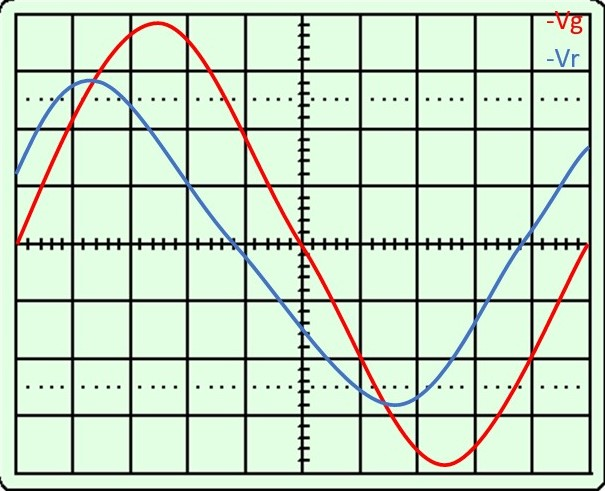